In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
credit_data = pd.read_csv('../data/credit.csv')

In [3]:
credit_subset = credit_data[['Income', 'Limit', 'Rating', 'Student']].copy()
credit_subset['Student'] = credit_subset['Student'].map({'No': 0, 'Yes':1})
credit_subset_columns = credit_subset.columns.values
credit_subset.head(3)

,Income,Limit,Rating,Student
0,14.891,3606,283,0
1,106.025,6645,483,1
2,104.593,7075,514,0


In [4]:
scaler = StandardScaler()
X = credit_subset.to_numpy()
X = scaler.fit_transform(X)

y = credit_data['Balance']

In [5]:
# create alphas between 10^-2 and 10^-5 
num_alphas = 1000
alphas = np.logspace(-2, 5, num_alphas)

# create empty array to store Ridge coefficients for each alpha
sklearn_coefficients = np.zeros((num_alphas, 4)) 
statsmodel_coefficients = np.zeros_like(sklearn_coefficients)

In [6]:
# calculate Ridge coefficients for each alpha
for alpha, row in zip(alphas, range(num_alphas)):
    sklearn_ridge_model = Ridge(alpha=alpha)
    sklearn_ridge_model.fit(X, y)
    sklearn_coefficients[row, :] = sklearn_ridge_model.coef_

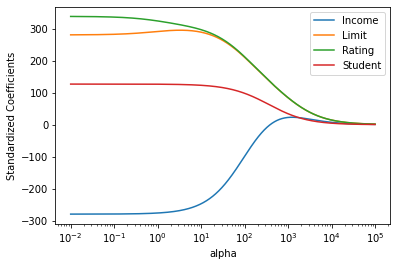

In [7]:
ax = plt.gca()
ax.plot(alphas, sklearn_coefficients)
ax.legend(credit_subset_columns)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('Standardized Coefficients')
plt.show()